In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
image=cv2.imread('iron_man.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [9]:
image.shape

(600, 960, 3)

In [45]:
ORIGINAL_SHAPE=(image.shape[0],image.shape[1],3)

In [46]:
ORIGINAL_SHAPE

(600, 960, 3)

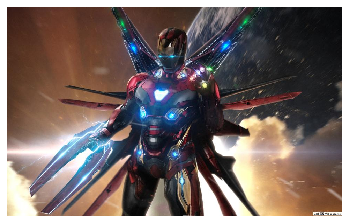

In [11]:
plt.axis('off')
plt.imshow(image)
plt.show()

In [20]:
img=image.reshape(-1,3)

In [21]:
img.shape

(576000, 3)

In [16]:
from sklearn.cluster import KMeans

In [87]:
km=KMeans(n_clusters=5, random_state=2)

In [128]:
km.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [118]:
centers=km.cluster_centers_
centers

array([[102.22475085,  70.53752253,  60.28503375],
       [237.47397134, 232.92340191, 219.15523512],
       [ 34.66263731,  32.231812  ,  37.01082434],
       [181.17104591, 146.15234901, 123.81681445],
       [ 85.59739132, 110.74663343, 144.2330002 ]])

In [127]:
centers=np.array(centers,dtype='uint8')
centers

array([[102,  70,  60],
       [237, 232, 219],
       [ 34,  32,  37],
       [181, 146, 123],
       [ 85, 110, 144]], dtype=uint8)

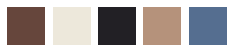

In [132]:
plt.figure(figsize=(8,4))
i=1
for c in centers:
    plt.subplot(1,10,i)
    plt.axis('off')
    i+=1
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=c
    plt.imshow(a)
plt.show()

In [133]:
km.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [99]:
new_img=image.copy()
new_img=new_img.reshape(image.shape[0]*image.shape[1],3)

In [101]:
for i in range(new_img.shape[0]):
    new_img[i]=centers[km.labels_[i]]


In [102]:
new_img=new_img.reshape(ORIGINAL_SHAPE)

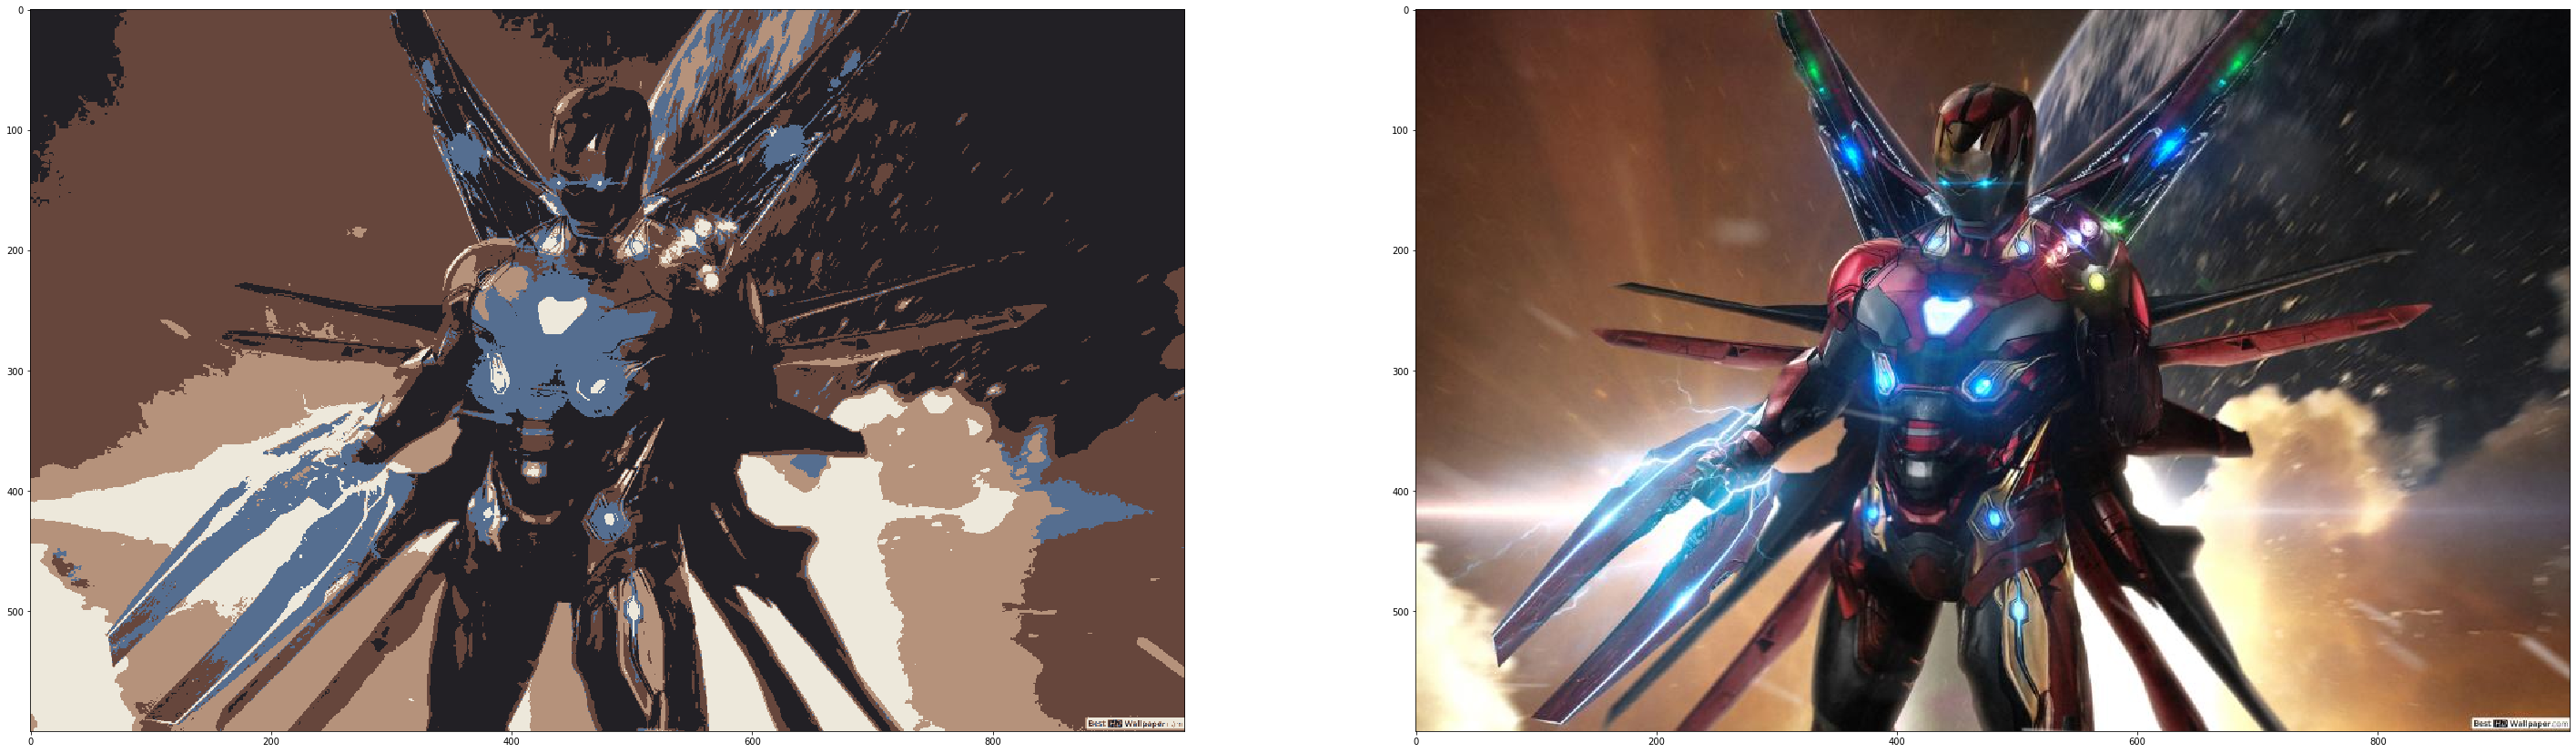

In [103]:
plt.figure(figsize=(50,40))
plt.subplot(1,2,1)
plt.imshow(new_img)
plt.subplot(1,2,2)
plt.imshow(image)